In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load your data
path = 'C:\\Users\\llohi\OneDrive - Universidad Torcuato Di Tella\\WB\\Data-Portal-Brief-Generator\\Analysis'
df = pd.read_excel(rf'{path}\summary_22_ago.xlsx')

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
C:\Users\llohi\AppData\Local\Temp\ipykernel_25748\3228742827.py:2: SyntaxWarning: invalid escape sequence '\O'
  path = 'C:\\Users\\llohi\OneDrive - Universidad Torcuato Di Tella\\WB\\Data-Portal-Brief-Generator\\Analysis'


In [4]:
# Calculate the percentage of all new changes by indicator in v2024
indicator_counts = df['v2024'].value_counts(normalize=True) * 100
display(indicator_counts)

v2024
Learning poverty (%)                                                36.259542
Youth not in employment, education or training (%)                  19.847328
Female labor force participation rate (%)                            8.778626
Adult unemployment rate (%)                                          8.778626
Participation rate in organized learning (%)                         4.580153
Net school enrollment rate, lower secondary (%)                      3.053435
Youth literacy rate (%), ages 15-24                                  2.290076
High skill employment rate (%)                                       2.290076
Youth unemployment rate (%)                                          1.908397
Adult informal employment rate (%)                                   1.908397
Children who are developmentally on track (%), ages 36-59 months     1.526718
Prevalence of obesity among adults (%)                               1.145038
Primary school completion rate (%)                        

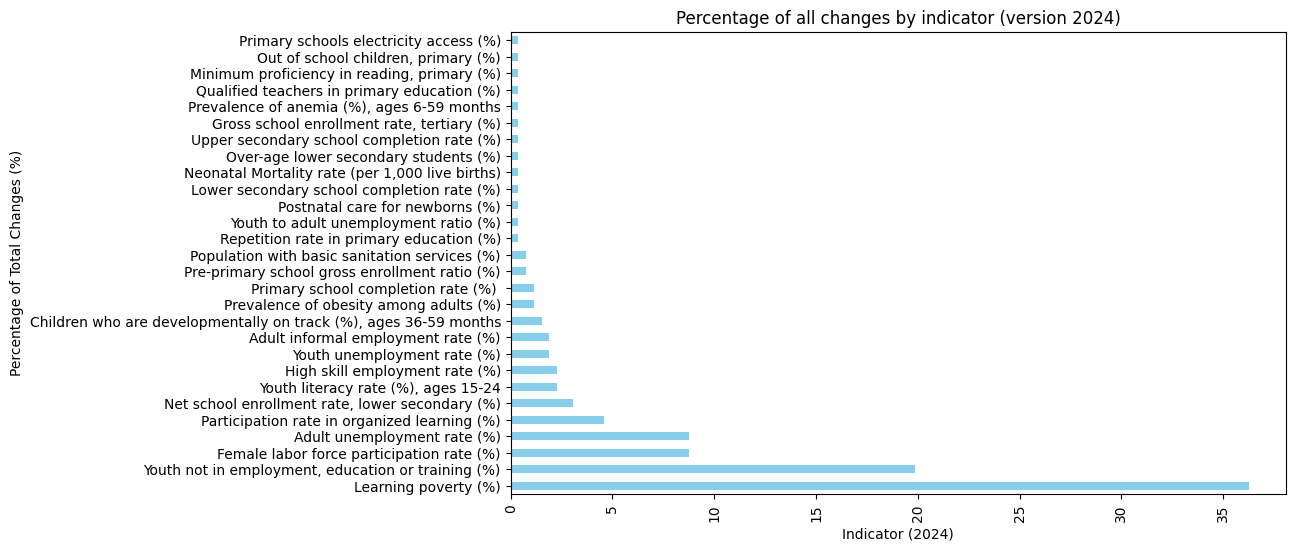

In [5]:
# Create a bar plot for the percentage of all new changes by indicator
plt.figure(figsize=(10, 6))
indicator_counts.plot(kind='barh', color='skyblue')
plt.title('Percentage of all changes by indicator (version 2024)')
plt.xlabel('Indicator (2024)')
plt.ylabel('Percentage of Total Changes (%)')
plt.xticks(rotation=90)
plt.show()


In [6]:
# Filter out rows where either v2023 or v2024 is NaN, to focus on shifts
#shift_df = df.dropna(subset=['v2023', 'v2024'])

df['category'] = df['position'].str.extract(r'([A-Za-z\s]+)-')[0].str.strip()
df = df.sort_values(by=['wbcountryname', 'category', 'position'])
df['v2023'] = df['v2023'].fillna(method='bfill')
df['v2024'] = df['v2024'].fillna(method='ffill')
df= df.drop_duplicates(subset=['wbcountryname', 'category', 'v2023', 'v2024'])

C:\Users\llohi\AppData\Local\Temp\ipykernel_25748\2613663764.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['v2023'] = df['v2023'].fillna(method='bfill')
C:\Users\llohi\AppData\Local\Temp\ipykernel_25748\2613663764.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['v2024'] = df['v2024'].fillna(method='ffill')


In [7]:
print(df.head())

    wbcode           wbcountryname             position  \
0      AFG             Afghanistan  Early childhood - 1   
2      ALB                 Albania       School age - 2   
99     EGY  Arab Republic of Egypt           Adults - 1   
101    EGY  Arab Republic of Egypt           Adults - 3   
105    EGY  Arab Republic of Egypt  Early childhood - 2   

                                                 v2023  \
0                      Postnatal care for newborns (%)   
2      Net school enrollment rate, lower secondary (%)   
99                  Probability of dying from NCDs (%)   
101  Health care facilities with basic sanitation s...   
105  Children who are developmentally on track (%),...   

                                                 v2024         category  
0    Children who are developmentally on track (%),...  Early childhood  
2                                 Learning poverty (%)       School age  
99           Female labor force participation rate (%)           Adults  


In [8]:
shifts = []
# Agrupar por país y categoría
grouped = df.groupby(['wbcountryname', 'category'])

In [9]:
display(grouped.head())

,wbcode,wbcountryname,position,v2023,v2024,category
0,AFG,Afghanistan,Early childhood - 1,Postnatal care for newborns (%),"Children who are developmentally on track (%),...",Early childhood
2,ALB,Albania,School age - 2,"Net school enrollment rate, lower secondary (%)",Learning poverty (%),School age
99,EGY,Arab Republic of Egypt,Adults - 1,Probability of dying from NCDs (%),Female labor force participation rate (%),Adults
101,EGY,Arab Republic of Egypt,Adults - 3,Health care facilities with basic sanitation s...,Adult unemployment rate (%),Adults
105,EGY,Arab Republic of Egypt,Early childhood - 2,"Children who are developmentally on track (%),...",Participation rate in organized learning (%),Early childhood
...,...,...,...,...,...,...
318,PSE,West Bank and Gaza,Adults - 3,Health care facilities with basic hygiene serv...,Adult unemployment rate (%),Adults
319,PSE,West Bank and Gaza,Youth - 2,Upper secondary school completion rate (%),"Youth literacy rate (%), ages 15-24",Youth
320,PSE,West Bank and Gaza,Youth - 3,"Gross school enrollment rate, tertiary (%)","Youth not in employment, education or training...",Youth
408,ZMB,Zambia,School age - 2,"Minimum proficiency in reading, primary (%)",Learning poverty (%),School age


In [10]:
shift_df = df.dropna(subset=['v2023', 'v2024', 'category'])
shift_df.to_excel(rf'{path}\shift_df_22_ago.xlsx', index=False)

In [12]:
# Count the number of shifts in position from v2023 to v2024
shift_counts = shift_df.groupby(['v2023', 'v2024']).size().reset_index(name='count')
shift_counts.to_excel(rf'{path}\shift_groups_22_ago.xlsx', index=False)
total_shifts = shift_counts['count'].sum()
shift_counts['frequency'] = (shift_counts['count'] / total_shifts) * 100

# Filter the top 10 most frequent shifts
top_shifts = shift_counts.nlargest(10, 'frequency')

In [13]:
# Contar el número de cambios por categoría
cat_counts = shift_df['category'].value_counts()
# Calcular el porcentaje de cambios por categoría
total_changes = cat_counts.sum()
cat_percentage = (cat_counts / total_changes) * 100
cat_percentage.to_excel(rf'{path}\category_changes_22_ago.xlsx')
# Mostrar el resultado
print(cat_percentage)


category
School age         41.911765
Youth              24.632353
Adults             22.058824
Early childhood    11.397059
Name: count, dtype: float64


In [14]:
# Count the number of changes per country
country_changes = shift_df['wbcountryname'].value_counts()
display(country_changes)
country_changes.to_excel(rf'{path}\country_changes.xlsx')
# Filtrar los 10 países con más cambios
top_countries = country_changes.nlargest(10)

wbcountryname
Macao SAR, China            6
Grenada                     5
Arab Republic of Egypt      5
Vietnam                     5
Islamic Republic of Iran    5
                           ..
Ecuador                     1
El Salvador                 1
New Zealand                 1
France                      1
Afghanistan                 1
Name: count, Length: 138, dtype: int64

In [12]:
display(shift_df)

,wbcode,wbcountryname,position,v2023,v2024,category
0,AFG,Afghanistan,Early childhood - 1,Postnatal care for newborns (%),"Children who are developmentally on track (%),...",Early childhood
2,ALB,Albania,School age - 2,"Net school enrollment rate, lower secondary (%)",Learning poverty (%),School age
99,EGY,Arab Republic of Egypt,Adults - 1,Probability of dying from NCDs (%),Female labor force participation rate (%),Adults
101,EGY,Arab Republic of Egypt,Adults - 3,Health care facilities with basic sanitation s...,Adult unemployment rate (%),Adults
105,EGY,Arab Republic of Egypt,Early childhood - 2,"Children who are developmentally on track (%),...",Participation rate in organized learning (%),Early childhood
...,...,...,...,...,...,...
318,PSE,West Bank and Gaza,Adults - 3,Health care facilities with basic hygiene serv...,Adult unemployment rate (%),Adults
319,PSE,West Bank and Gaza,Youth - 2,Upper secondary school completion rate (%),"Youth literacy rate (%), ages 15-24",Youth
320,PSE,West Bank and Gaza,Youth - 3,"Gross school enrollment rate, tertiary (%)","Youth not in employment, education or training...",Youth
408,ZMB,Zambia,School age - 2,"Minimum proficiency in reading, primary (%)",Learning poverty (%),School age


In [13]:
# Configurar matplotlib para usar "Times New Roman"
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # Puedes ajustar el tamaño de la fuente si lo deseas


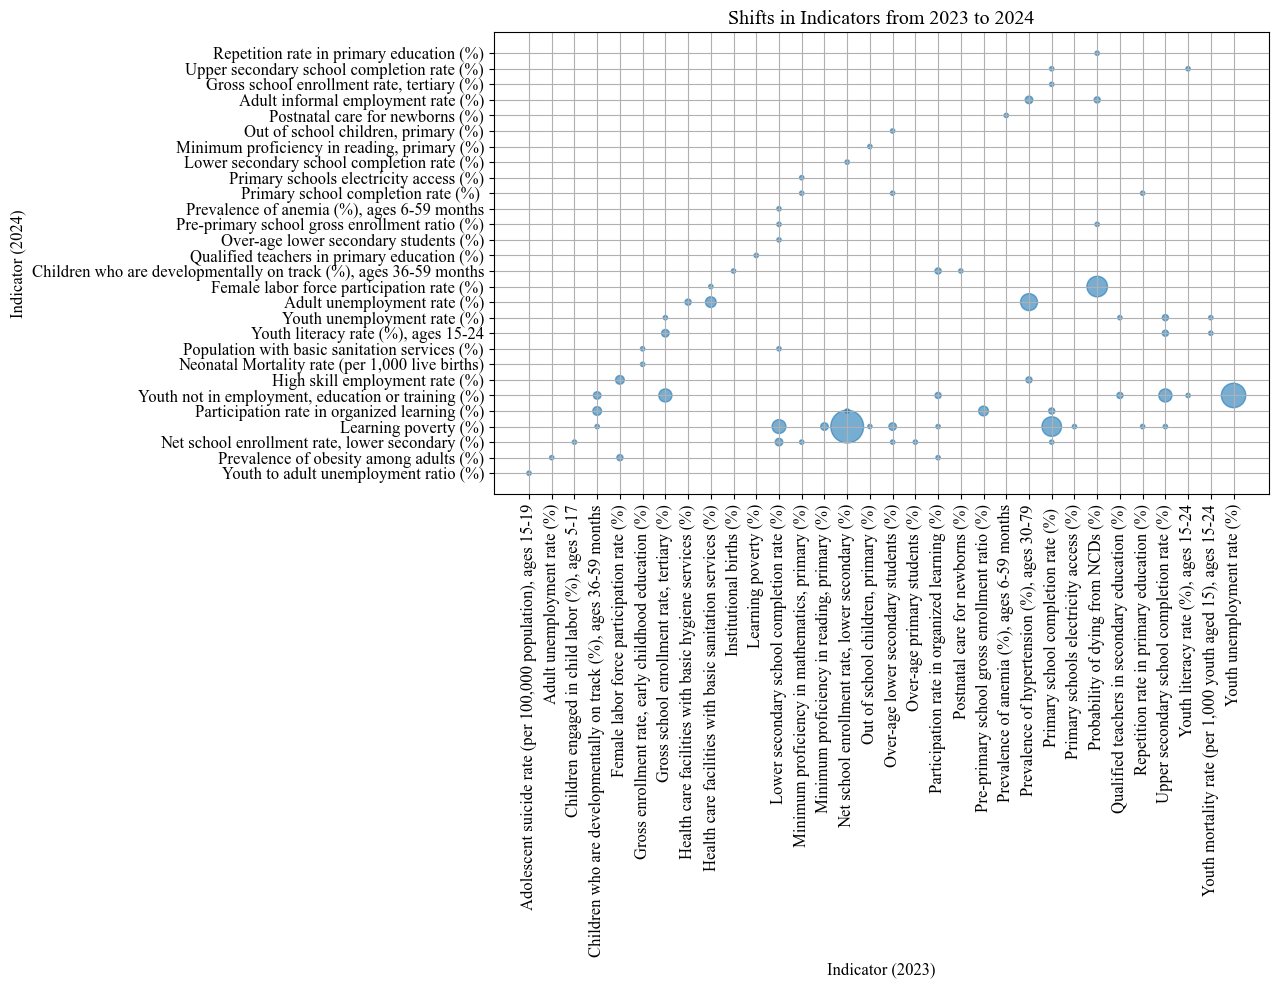

In [14]:
# Visualize the shifts between v2023 and v2024 indicators
plt.figure(figsize=(10, 6))
plt.scatter(shift_counts['v2023'], shift_counts['v2024'], s=shift_counts['count']*10, alpha=0.6)
plt.title('Shifts in Indicators from 2023 to 2024')
plt.xlabel('Indicator (2023)')
plt.ylabel('Indicator (2024)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.grid(True)
plt.show()

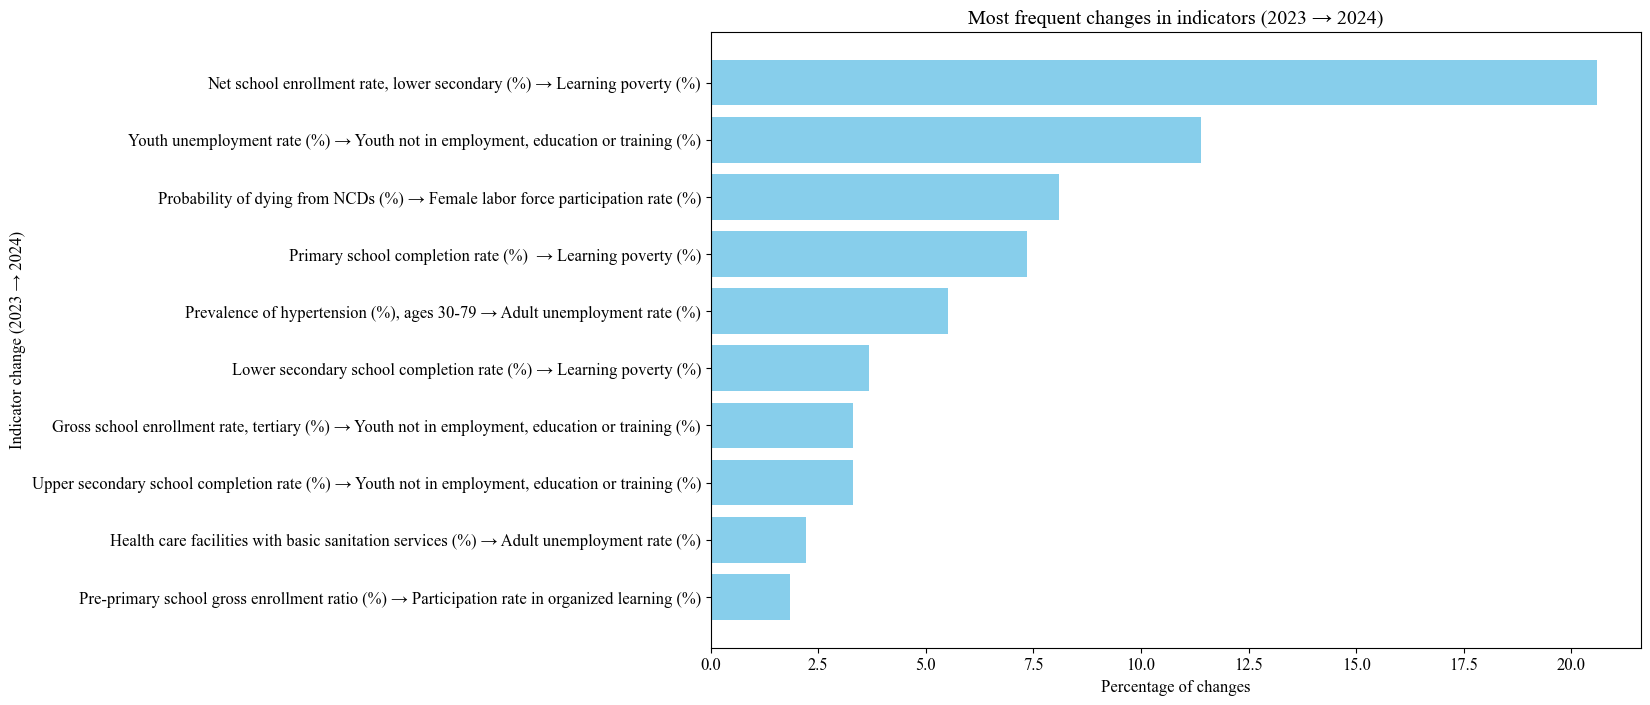

In [15]:
# Filtra los cambios y calcula los más frecuentes
top_shifts = shift_counts.nlargest(10, 'count')  # Aquí seleccionamos los 10 cambios más frecuentes

# Crear un gráfico de barras para mostrar los cambios más frecuentes
plt.figure(figsize=(12, 8))
plt.barh(top_shifts.apply(lambda x: f"{x['v2023']} → {x['v2024']}", axis=1), top_shifts['frequency'], color='skyblue')
plt.xlabel('Percentage of changes')
plt.ylabel('Indicator change (2023 → 2024)')
plt.title('Most frequent changes in indicators (2023 → 2024)')
plt.gca().invert_yaxis()  # Invertir el eje y para que el cambio más frecuente esté arriba

plt.show()